In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
dataframe = pd.read_csv("/content/Zomato data .csv")
print(dataframe.head())


                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [11]:
def handleRate(value):
	value=str(value).split('/')
	value=value[0];
	return float(value)

dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())


                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [12]:
dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0.5, 0, 'Type of restaurant')

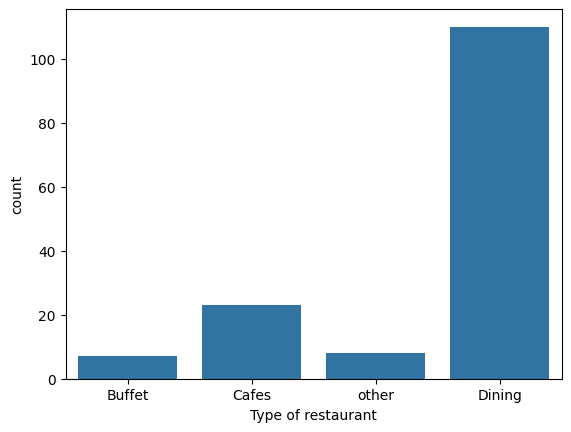

In [13]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of restaurant")


Text(0, 0.5, 'Votes')

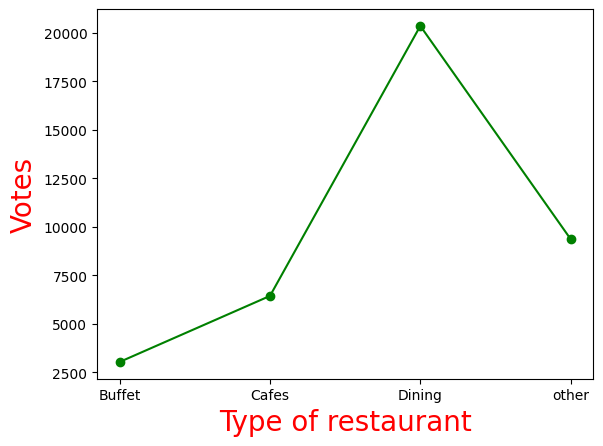

In [14]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("Type of restaurant", c="red", size=20)
plt.ylabel("Votes", c="red", size=20)


In [15]:
max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']

print("Restaurant(s) with the maximum votes:")
print(restaurant_with_max_votes)


Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

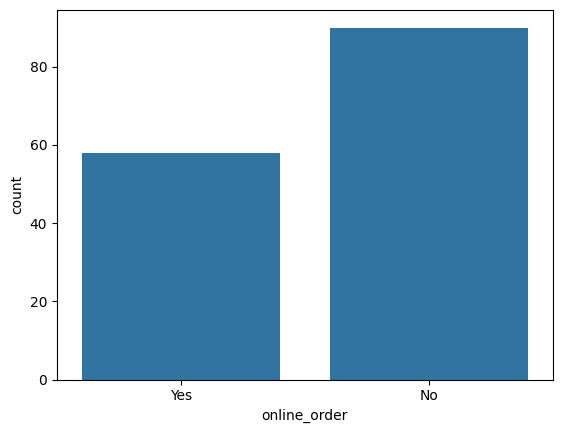

In [19]:
sns.countplot(x=dataframe['online_order'])

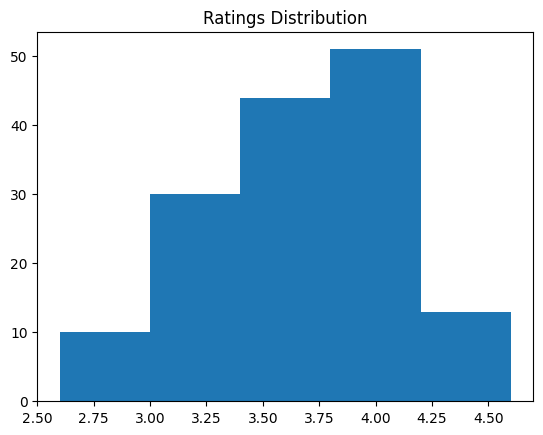

In [20]:
plt.hist(dataframe['rate'],bins=5)
plt.title("Ratings Distribution")
plt.show()


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

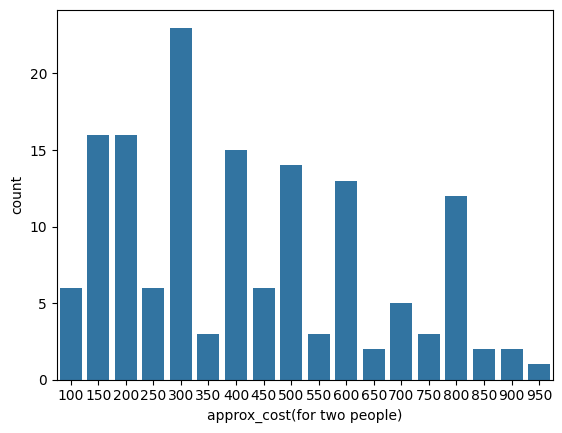

In [21]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)


<Axes: xlabel='online_order', ylabel='rate'>

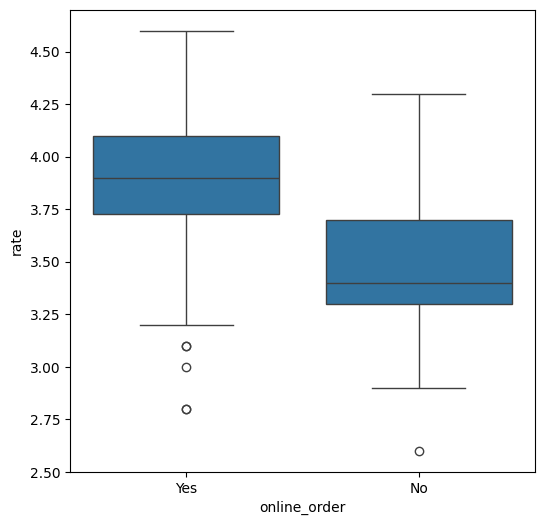

In [22]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe)


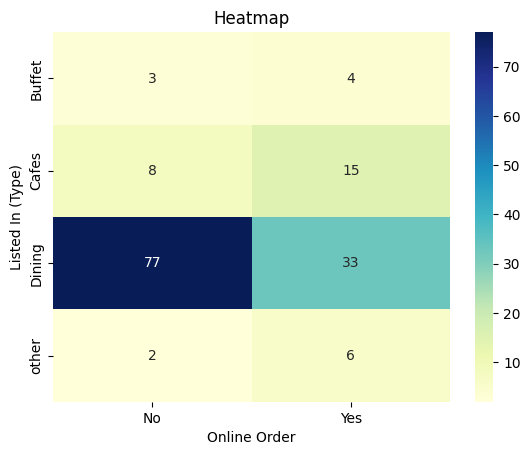

In [23]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()


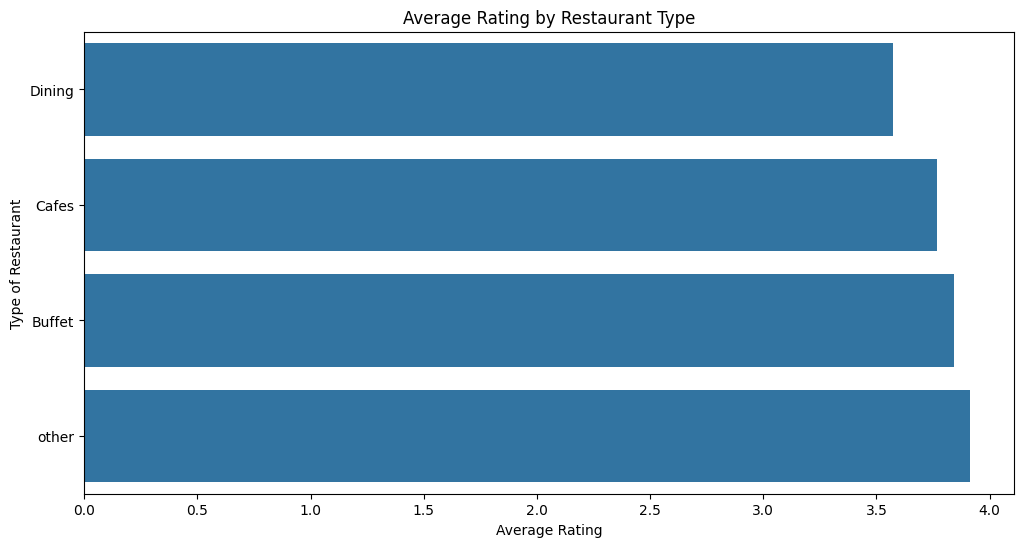

In [25]:
plt.figure(figsize=(12, 6))
avg_rating_by_type = dataframe.groupby('listed_in(type)')['rate'].mean().sort_values()
sns.barplot(x=avg_rating_by_type, y=avg_rating_by_type.index)
plt.title("Average Rating by Restaurant Type")
plt.xlabel("Average Rating")
plt.ylabel("Type of Restaurant")
plt.show()


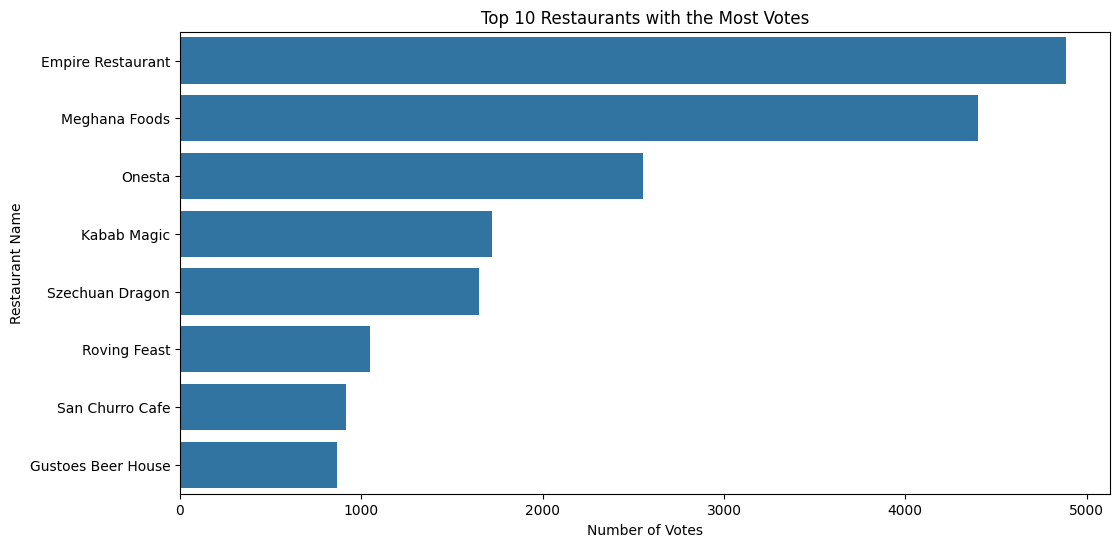

In [27]:
top_10_votes = dataframe.nlargest(10, 'votes')
plt.figure(figsize=(12, 6))
sns.barplot(x='votes', y='name', data=top_10_votes)
plt.title("Top 10 Restaurants with the Most Votes")
plt.xlabel("Number of Votes")
plt.ylabel("Restaurant Name")
plt.show()


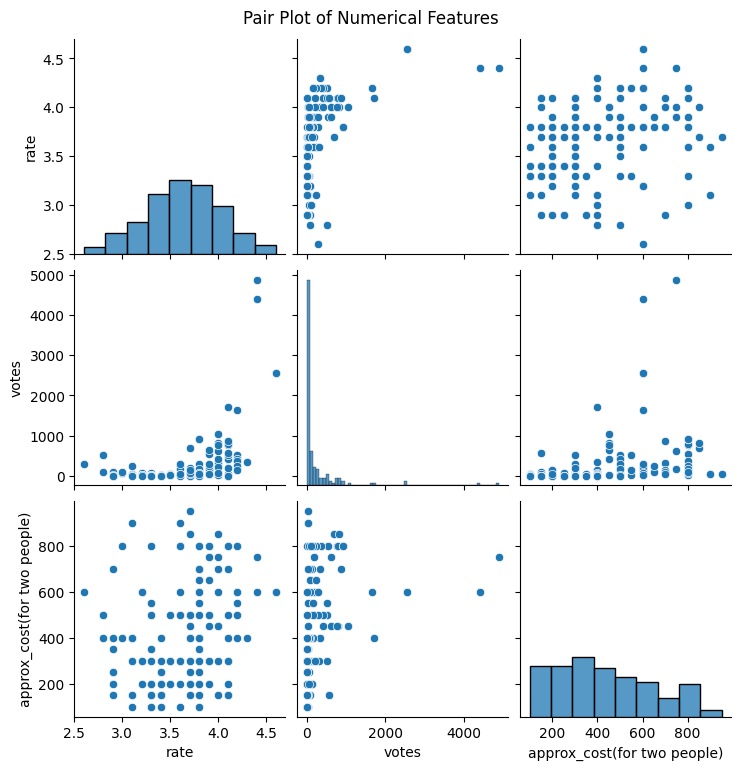

In [29]:
numerical_features = ['rate', 'votes', 'approx_cost(for two people)']
sns.pairplot(dataframe[numerical_features])
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()


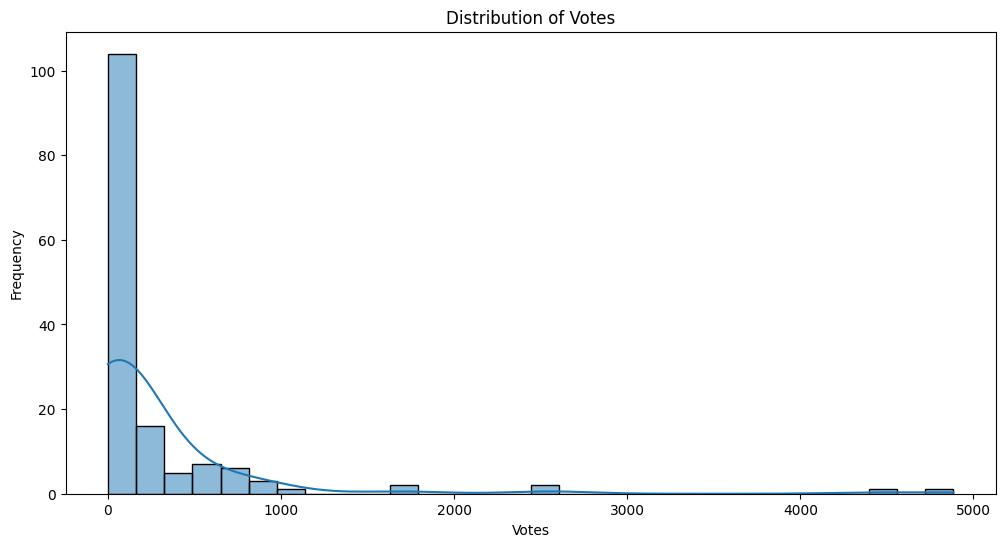

In [30]:
plt.figure(figsize=(12, 6))
sns.histplot(dataframe['votes'], kde=True, bins=30)
plt.title("Distribution of Votes")
plt.xlabel("Votes")
plt.ylabel("Frequency")
plt.show()


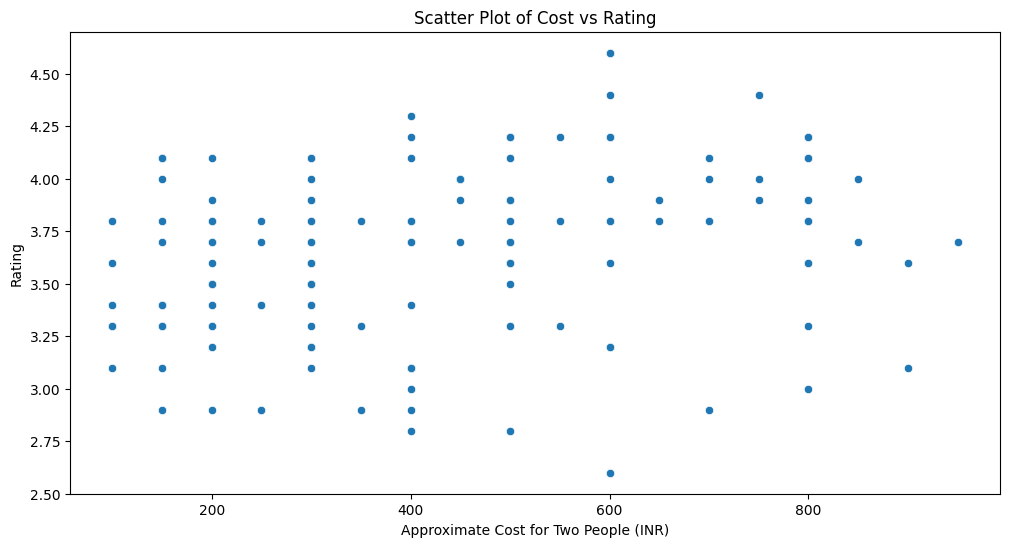

In [32]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='approx_cost(for two people)', y='rate', data=dataframe)
plt.title("Scatter Plot of Cost vs Rating")
plt.xlabel("Approximate Cost for Two People (INR)")
plt.ylabel("Rating")
plt.show()


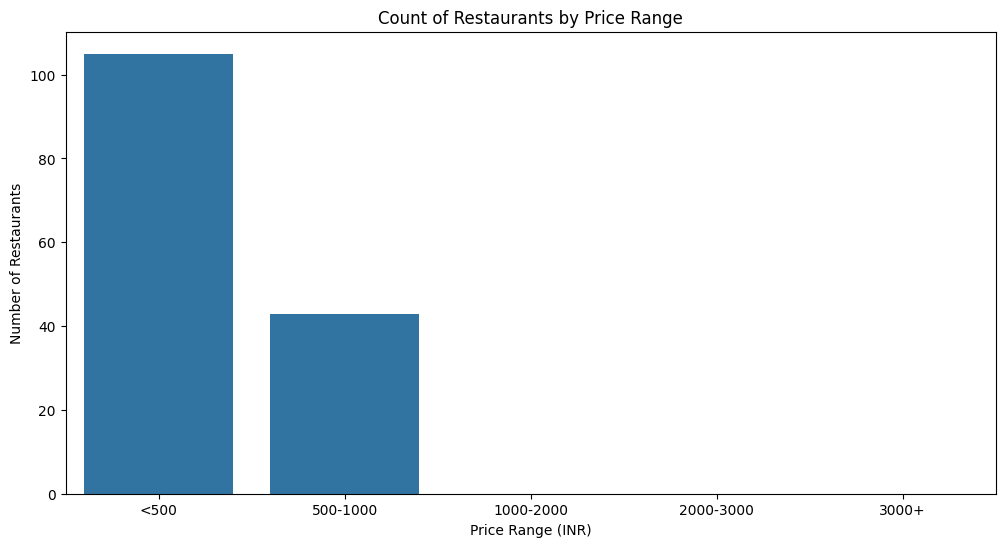

In [33]:
# First, convert the 'approx_cost(for two people)' to numeric, if not already
dataframe['approx_cost(for two people)'] = dataframe['approx_cost(for two people)'].replace(',', '', regex=True).astype(float)

bins = [0, 500, 1000, 2000, 3000, np.inf]
labels = ['<500', '500-1000', '1000-2000', '2000-3000', '3000+']
dataframe['price_range'] = pd.cut(dataframe['approx_cost(for two people)'], bins=bins, labels=labels)

plt.figure(figsize=(12, 6))
sns.countplot(x='price_range', data=dataframe)
plt.title("Count of Restaurants by Price Range")
plt.xlabel("Price Range (INR)")
plt.ylabel("Number of Restaurants")
plt.show()
